# CLP program

In [1]:
print(f'povezave: {graphs.CycleGraph(5).edges()}')
print(f'vozlisca: {graphs.CycleGraph(5).vertices()}')

povezave: [(0, 1, None), (0, 4, None), (1, 2, None), (2, 3, None), (3, 4, None)]
vozlisca: [0, 1, 2, 3, 4]


In [2]:
from sage.numerical.mip import MixedIntegerLinearProgram

def razdalja(moznost, vozlisce, G):
    c, a = moznost
    if c == 'e':
        U, V = a
        return min(G.distance(U, vozlisce), G.distance(V, vozlisce))
    else:
        return G.distance(a, vozlisce)

In [3]:
# najprej bi rada definirala razdaljo - različne možnosti, glede na to kaj dobiš
# vse skupaj 4 moznosti povezava-povezava, povezava-vozlišče, vozlišče-povezava, vozlišče-vozlišče
def razdalja_prejsnja(moznost1, moznost2, G):
    c, a = moznost1
    d, b = moznost2
    # če imamo dve povezavi
    if c == 'e' and d == 'e':
        U, V = a
        W, X = b
        return min(G.distance(U, W), G.distance(U, X), G.distance(V, W), G.distance(V, X))
    # prva povezava, druga ne
    elif c == 'e':
        U, V = a
        return min(G.distance(U, b), G.distance(V, b))
    # druga povezava, prva ne
    elif d == 'e':
        W, X = b
        return min(G.distance(W, a), G.distance(X, a))
    # ce mamo dve vozlisci
    else:
        return G.distance(a, b)

In [4]:
G = graphs.CycleGraph(6)
razdalja(('e', (0, 1)), 5, G)

1

In [5]:
def CLP_weak_k_dim(G, k):
    p = MixedIntegerLinearProgram(maximization=False)
    x = p.new_variable(binary=True)

    V = G.vertices()
    E = G.edges(labels=False)

    moznosti = [('v', v) for v in V] + [('e', e) for e in E]

    p.set_objective(sum(x[v] for v in V))
    
    for a, b in Combinations(moznosti, 2):
        p.add_constraint(
            sum(abs(razdalja(a, v, G) - razdalja(b, v, G)) * x[v] for v in V) >= k
            )

    wmdim_k = p.solve()
    mnozica_S = [v for v in V if p.get_values(x[v]) > 0.5]

    return (wmdim_k, mnozica_S)

In [6]:
G = graphs.CycleGraph(7)
k = 3

print(f'{CLP_weak_k_dim(G,k)}')

(7.0, [0, 1, 2, 3, 4, 5, 6])


In [7]:
def kappa_2_crti(G):
    k = 1
    while True:
        try:
            CLP_weak_k_dim(G, k)
            k += 1
        except:
            return k - 1

In [8]:
kappa_2_crti(G)

3

# Cikli

In [9]:
def cikli_do_n(n):
    for i in range(3, n + 1):
        G = graphs.CycleGraph(i) 
        kappa_2crti = kappa_2_crti(G)
        print(f"- velikost: {i} : kappa = {kappa_2crti}")
        for k in range(1, kappa_2crti + 1):
            wmdim, _ = CLP_weak_k_dim(G, k)
            print(f"  k = {k}, wmdim = {wmdim}")

In [10]:
cikli_do_n(10)

- velikost: 3 : kappa = 1
  k = 1, wmdim = 3.0
- velikost: 4 : kappa = 2
  k = 1, wmdim = 3.0
  k = 2, wmdim = 4.0
- velikost: 5 : kappa = 2
  k = 1, wmdim = 3.0
  k = 2, wmdim = 5.0
- velikost: 6 : kappa = 3
  k = 1, wmdim = 3.0
  k = 2, wmdim = 4.0
  k = 3, wmdim = 6.0
- velikost: 7 : kappa = 3
  k = 1, wmdim = 3.0
  k = 2, wmdim = 5.0
  k = 3, wmdim = 7.0
- velikost: 8 : kappa = 4
  k = 1, wmdim = 3.0
  k = 2, wmdim = 4.0
  k = 3, wmdim = 6.0
  k = 4, wmdim = 8.0
- velikost: 9 : kappa = 4
  k = 1, wmdim = 3.0
  k = 2, wmdim = 5.0
  k = 3, wmdim = 7.0
  k = 4, wmdim = 9.0
- velikost: 10 : kappa = 5
  k = 1, wmdim = 3.0
  k = 2, wmdim = 4.0
  k = 3, wmdim = 6.0
  k = 4, wmdim = 8.0
  k = 5, wmdim = 10.0


Glede na dani vzorec sklepam, da je $$\kappa''(G)= \Big\lfloor \frac{n}{2} \Big\rfloor.$$ 

Za $wmdim_k(G)$ pa lahko opazimo naslednjo formulo: $$wmdim_1(G) = 3,$$
$$wmdim_k(G) = \begin{cases}
2k, &\text{če} \ n \ \text{sod}\\
2k + 1, &\text{če} \ n \ \text{lih}
\end{cases}$$

# Hiperkocke

In [11]:
def hiperkocke_do_n(n):
    for i in range(1, n + 1):
        G = graphs.CubeGraph(i)
        kappa_2crti = kappa_2_crti(G)
        print(f"- velikost: {i} : kappa = {kappa_2crti}")
        for k in range(kappa_2crti + 1):
            wmdim, _ = CLP_weak_k_dim(G, k)
            print(f"  k = {k}, wmdim = {wmdim}")

In [12]:
k = 3
H = graphs.CubeGraph(4)
CLP_weak_k_dim(H, k)

(7.0, ['0001', '0010', '0110', '1000', '1011', '1100', '1111'])

In [13]:
hiperkocke_do_n(4)

- velikost: 1 : kappa = 1
  k = 0, wmdim = 0.0
  k = 1, wmdim = 2.0
- velikost: 2 : kappa = 2
  k = 0, wmdim = 0.0
  k = 1, wmdim = 3.0
  k = 2, wmdim = 4.0
- velikost: 3 : kappa = 4
  k = 0, wmdim = 0.0
  k = 1, wmdim = 3.0
  k = 2, wmdim = 4.0
  k = 3, wmdim = 7.0
  k = 4, wmdim = 8.0
- velikost: 4 : kappa = 8
  k = 0, wmdim = 0.0
  k = 1, wmdim = 4.0
  k = 2, wmdim = 5.0
  k = 3, wmdim = 7.0
  k = 4, wmdim = 8.0
  k = 5, wmdim = 11.0
  k = 6, wmdim = 14.0
  k = 7, wmdim = 15.0
  k = 8, wmdim = 16.0


Na podlagi rezultatov za prvih nekaj $n$ lahko sklepamo, da je $\kappa''(G) = 2^{n-1}$. Za $wmdim_k(G)$ zaenkrat težko sklepam.

# Kartezični produkt ciklov

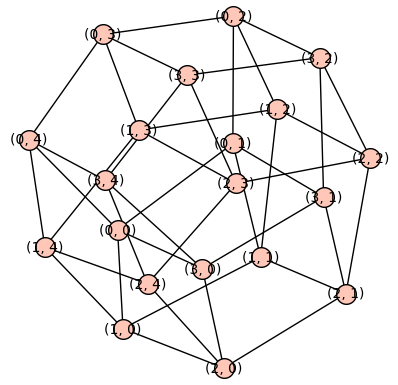

In [14]:
l, m = 4,5

A = graphs.CycleGraph(l)
B = graphs.CycleGraph(m)
G = A.cartesian_product(B)

G.show()

In [15]:
def kartezicni_produkt_do_n(n):
    for l in range(3, n + 1):
        A = graphs.CycleGraph(l)
        for m in range(n, n + 1):   # butasta koda z moje strani, prej sm mela drugacen loop
            B = graphs.CycleGraph(m)
            G = A.cartesian_product(B)
            kappa_2crti = kappa_2_crti(G)
            print(f"- velikost: {l, m} : kappa = {kappa_2crti}")
            for k in range(kappa_2crti + 1):
                wmdim, _ = CLP_weak_k_dim(G, k)
                print(f"  k = {k}, wmdim = {wmdim}")

In [16]:
#kartezicni_produkt_do_n(6)

In [17]:
gen = graphs.nauty_geng('4 -c')

In [18]:
#for g in gen:
#    g.show()

In [19]:
# za n = 1,2,3
def poisci_grafe_z_wmdim_k_n(od, do, n):
    for i in range(od, do + 1):
        print(f'Povezani grafi na {i} vozliscih z wmdim_k(G) = {n}:')
        for G in graphs.nauty_geng(f'{i} -c'):
            kappa_2crti = kappa_2_crti(G)
            for k in range(1, kappa_2crti + 1):
                wmdim_k, _ = CLP_weak_k_dim(G, k)
                if wmdim_k == n:
                    G.show()
                    print(f'Graf {G.name()}')

Grafi za katere je $wmdim_k(G) = 1$

In [20]:
poisci_grafe_z_wmdim_k_n(5,8,1)

Povezani grafi na 5 vozliscih z wmdim_k(G) = 1:
Povezani grafi na 6 vozliscih z wmdim_k(G) = 1:
Povezani grafi na 7 vozliscih z wmdim_k(G) = 1:
Povezani grafi na 8 vozliscih z wmdim_k(G) = 1:


Gradi za katere je wmdim_k(G) = 2

Povezani grafi na 5 vozliscih z wmdim_k(G) = 2:


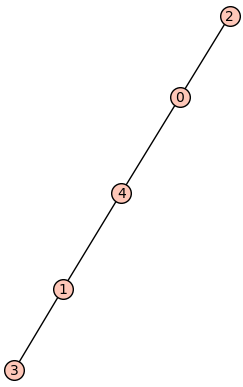

Graf 
Povezani grafi na 6 vozliscih z wmdim_k(G) = 2:


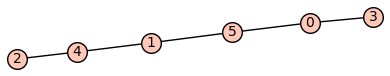

Graf 
Povezani grafi na 7 vozliscih z wmdim_k(G) = 2:


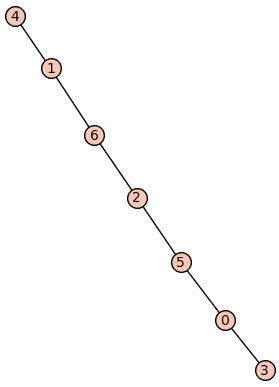

Graf 
Povezani grafi na 8 vozliscih z wmdim_k(G) = 2:


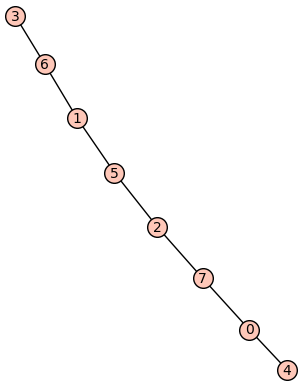

Graf 


In [21]:
poisci_grafe_z_wmdim_k_n(5,8,2)

Grafi za katere je wmdim_k(G) = 3

Povezani grafi na 5 vozliscih z wmdim_k(G) = 3:


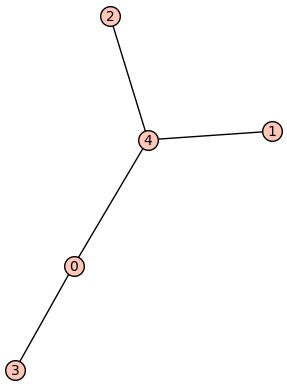

Graf 


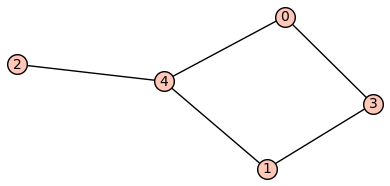

Graf 


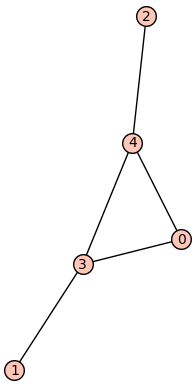

Graf 


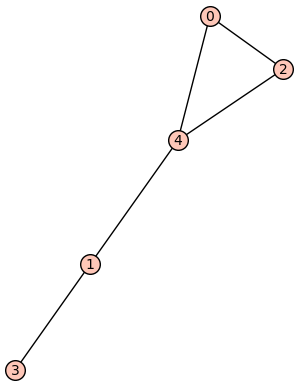

Graf 


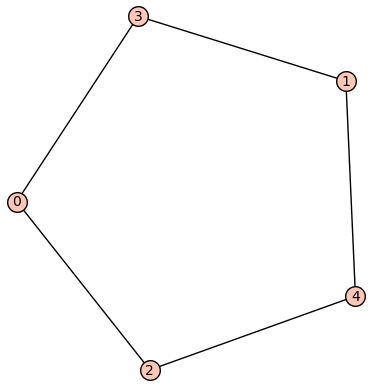

Graf 


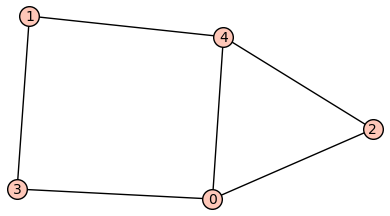

Graf 
Povezani grafi na 6 vozliscih z wmdim_k(G) = 3:


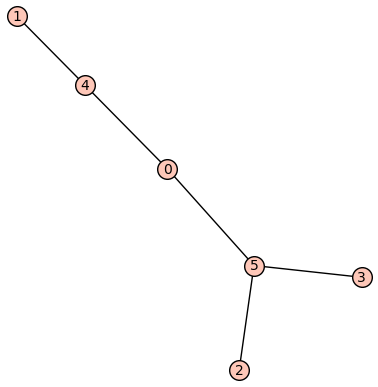

Graf 


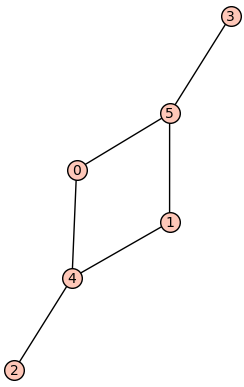

Graf 


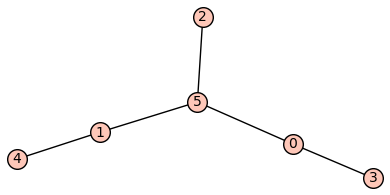

Graf 


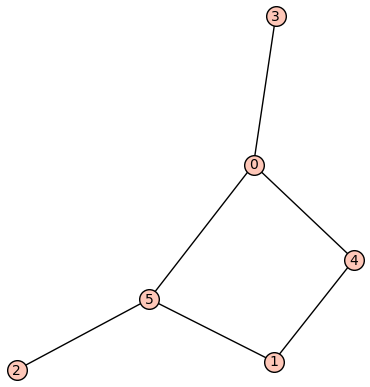

Graf 


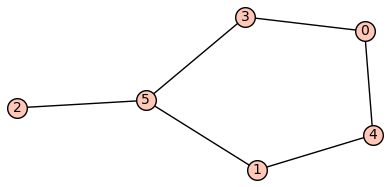

Graf 


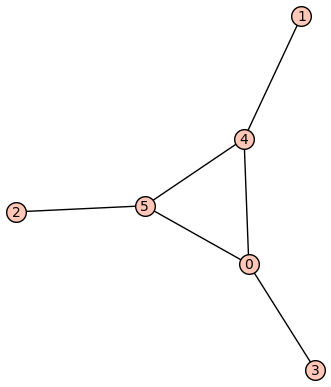

Graf 


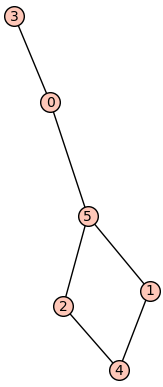

Graf 


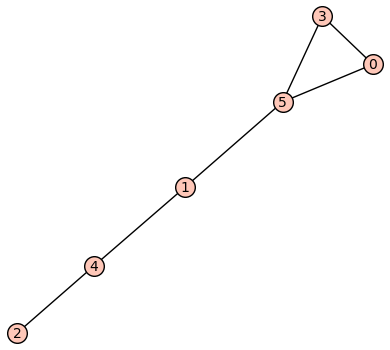

Graf 


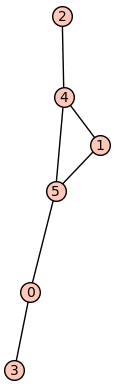

Graf 


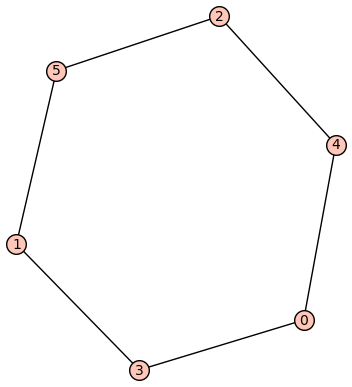

Graf 


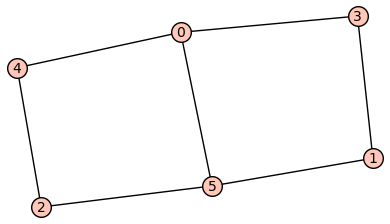

Graf 


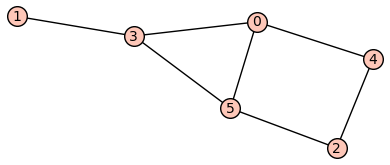

Graf 


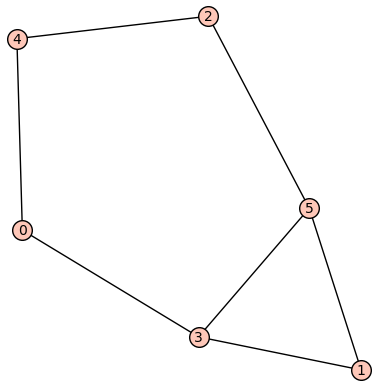

Graf 


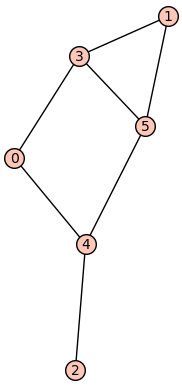

Graf 
Povezani grafi na 7 vozliscih z wmdim_k(G) = 3:


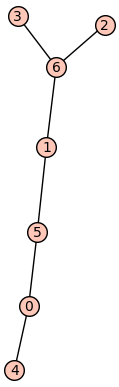

Graf 


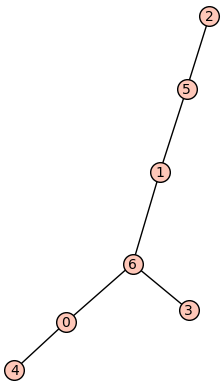

Graf 


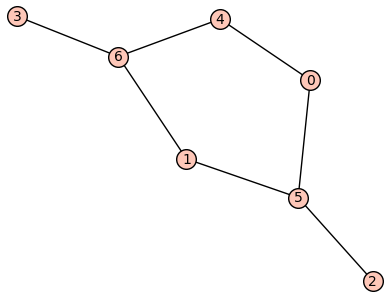

Graf 


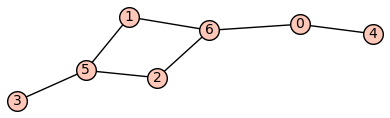

Graf 


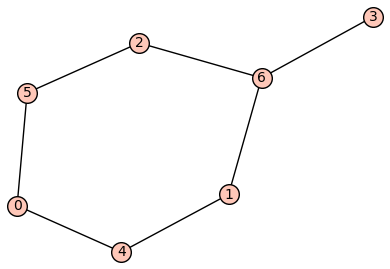

Graf 


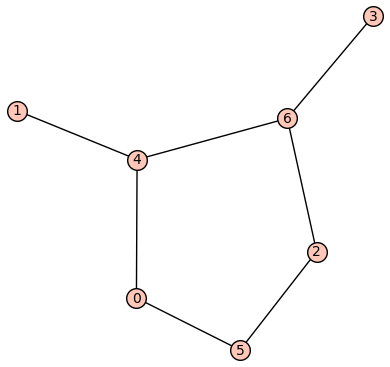

Graf 


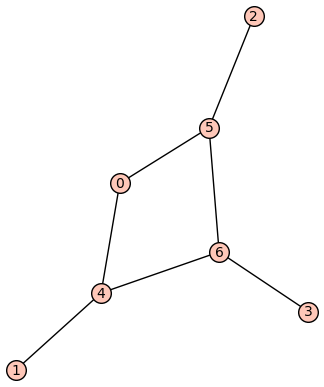

Graf 


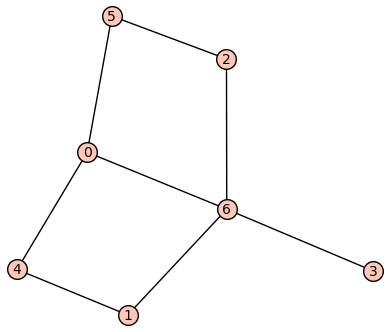

Graf 


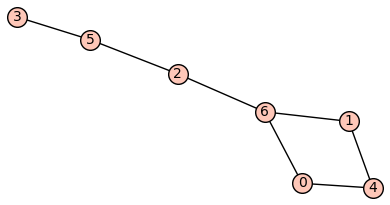

Graf 


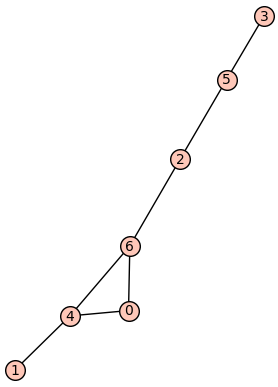

Graf 


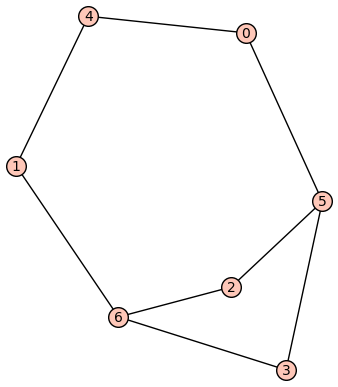

Graf 


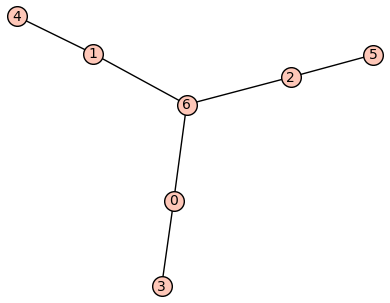

Graf 


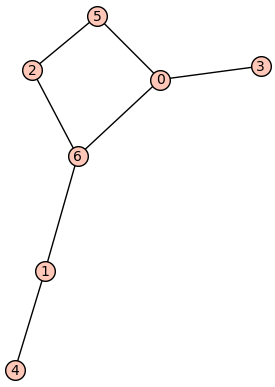

Graf 


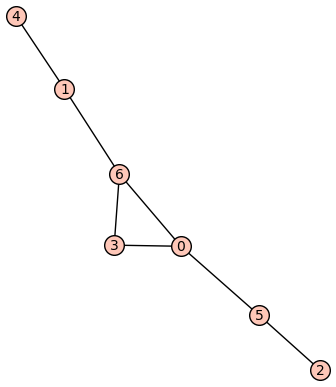

Graf 


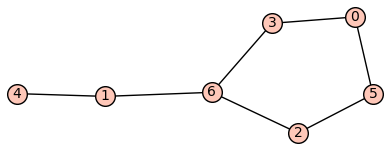

Graf 


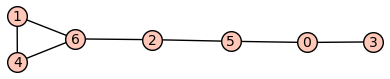

Graf 


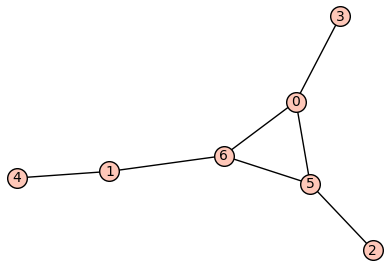

Graf 


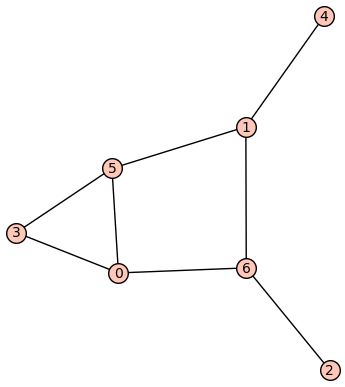

Graf 


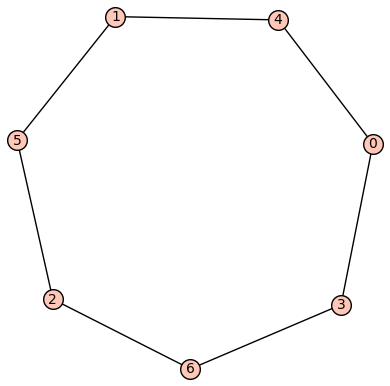

Graf 


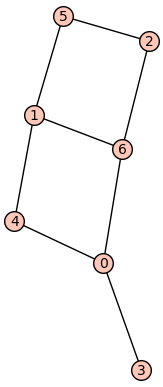

Graf 


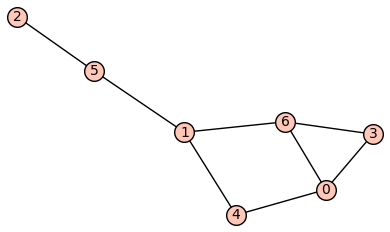

Graf 


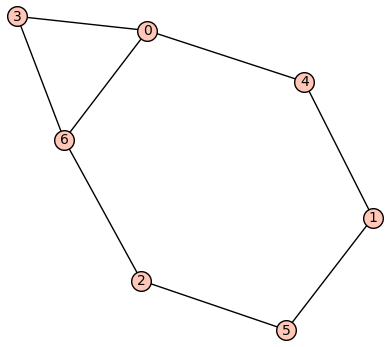

Graf 


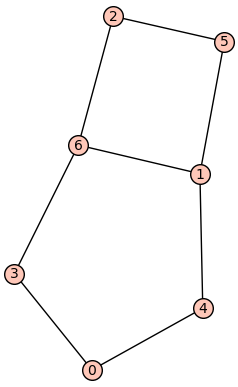

Graf 


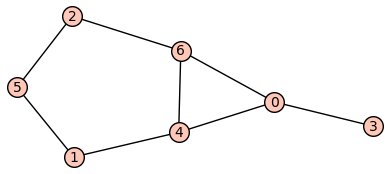

Graf 


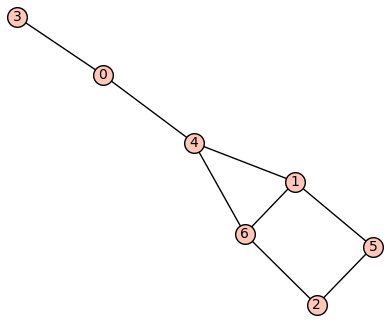

Graf 


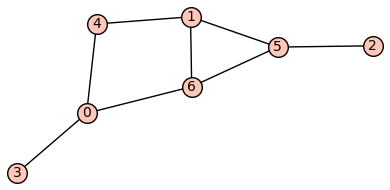

Graf 


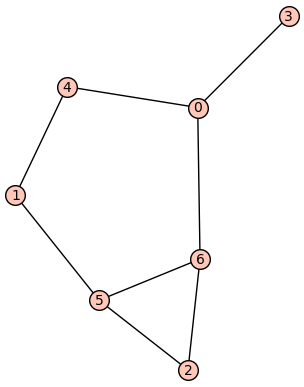

Graf 


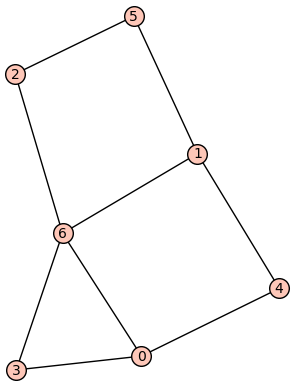

Graf 


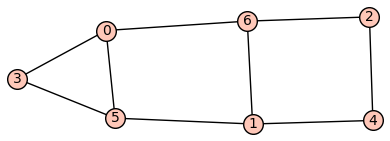

Graf 


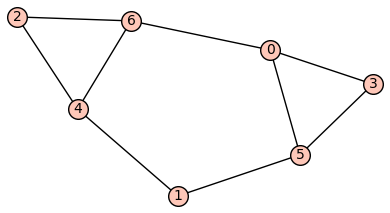

Graf 


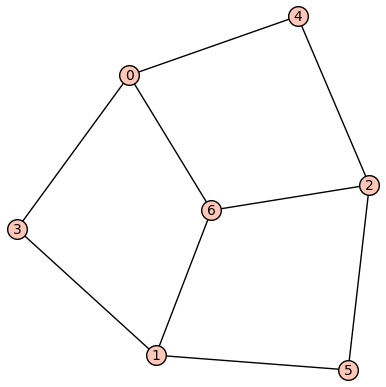

Graf 
Povezani grafi na 8 vozliscih z wmdim_k(G) = 3:


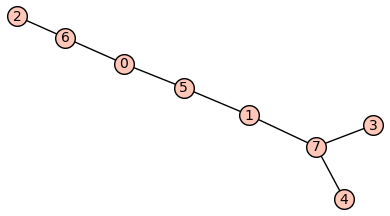

Graf 


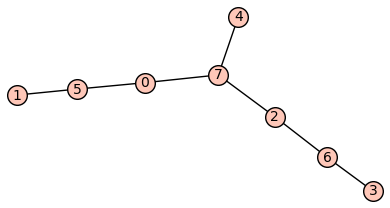

Graf 


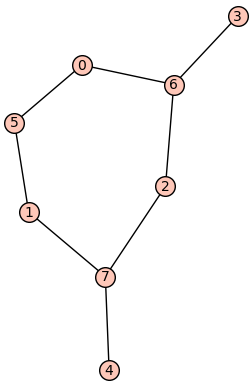

Graf 


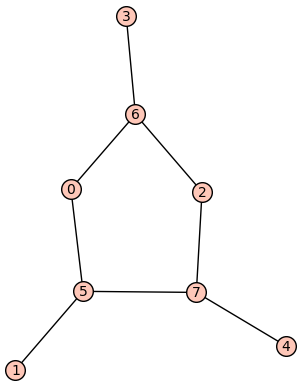

Graf 


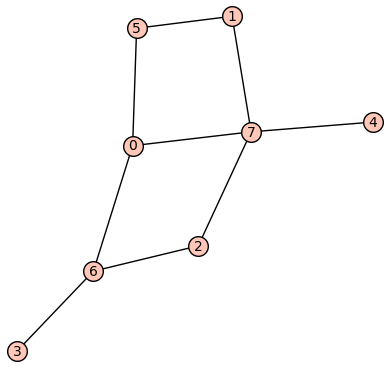

Graf 


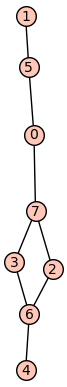

Graf 


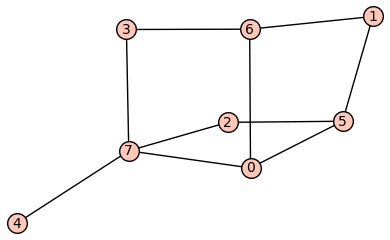

Graf 


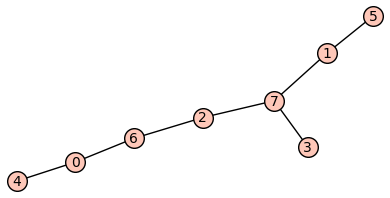

Graf 


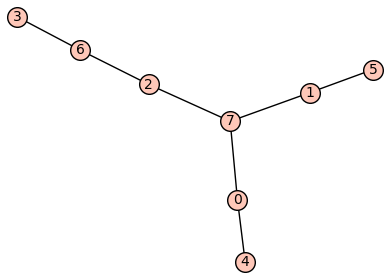

Graf 


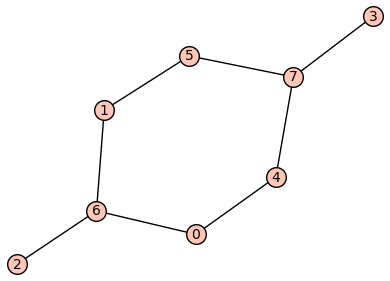

Graf 


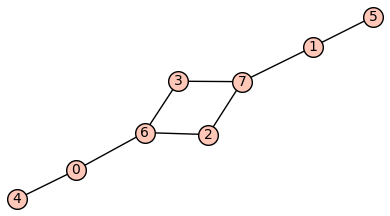

Graf 


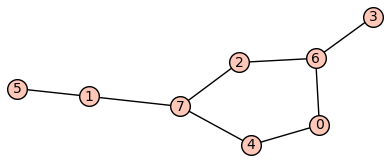

Graf 


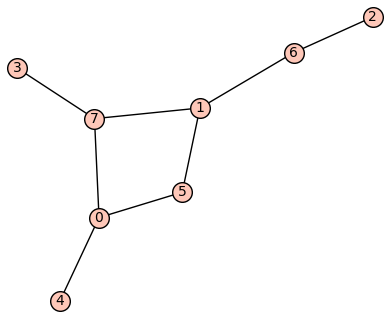

Graf 


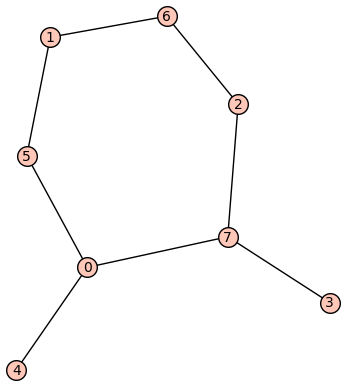

Graf 


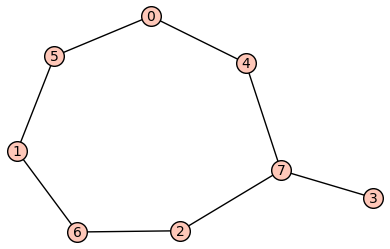

Graf 


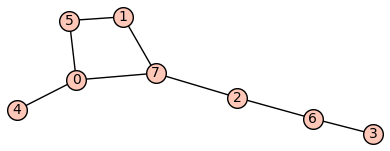

Graf 


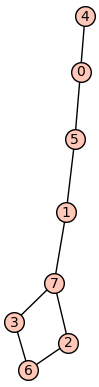

Graf 


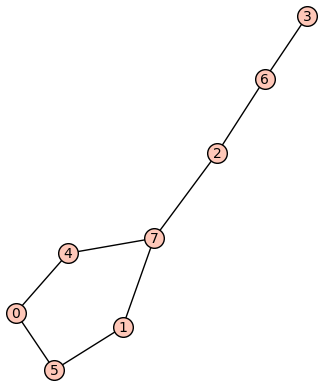

Graf 


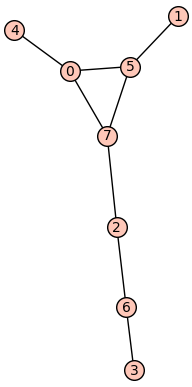

Graf 


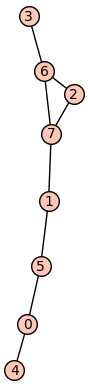

Graf 


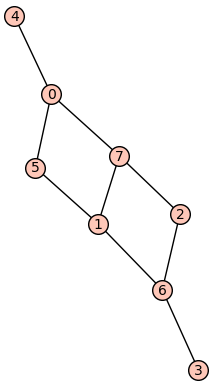

Graf 


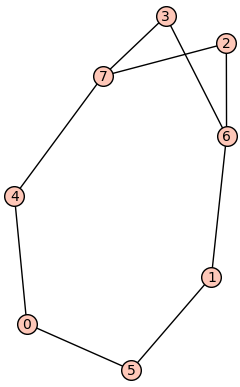

Graf 


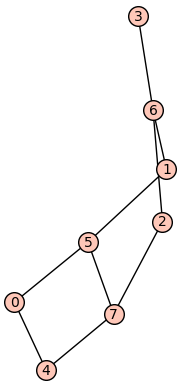

Graf 


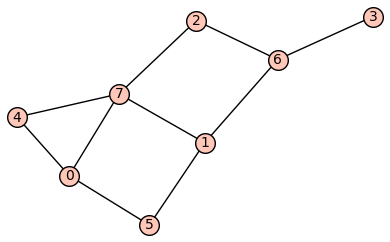

Graf 


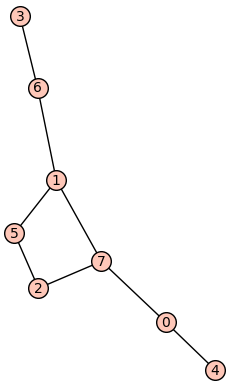

Graf 


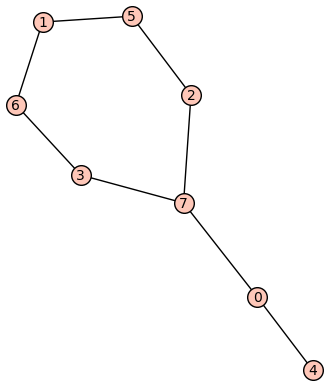

Graf 


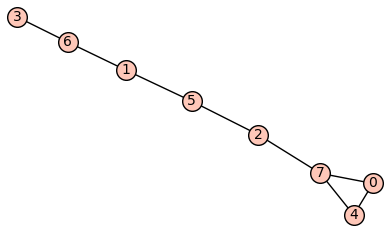

Graf 


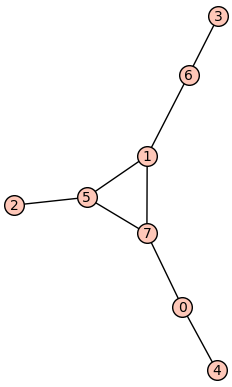

Graf 


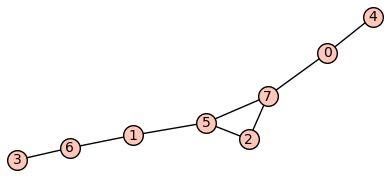

Graf 


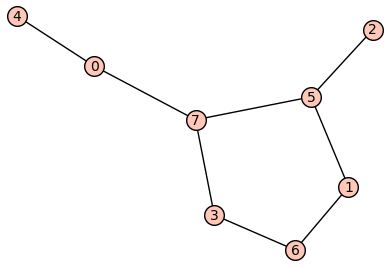

Graf 


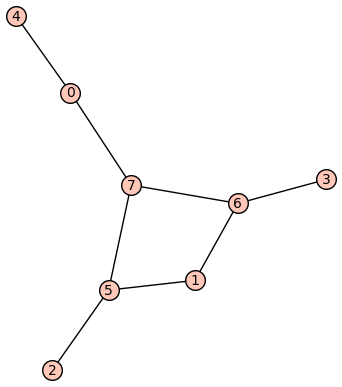

Graf 


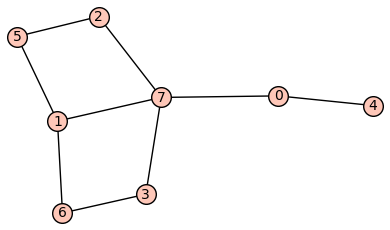

Graf 


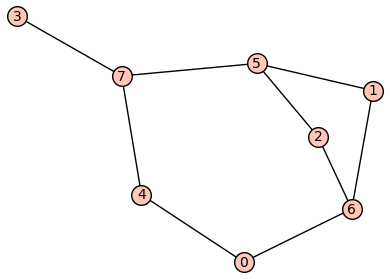

Graf 


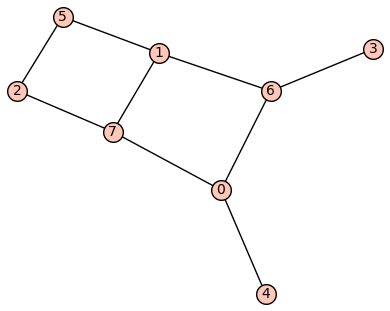

Graf 


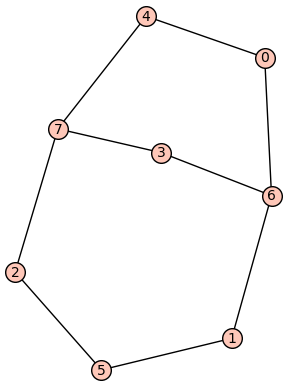

Graf 


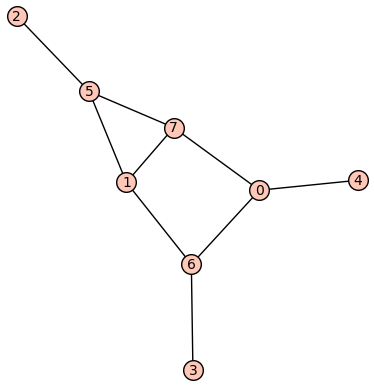

Graf 


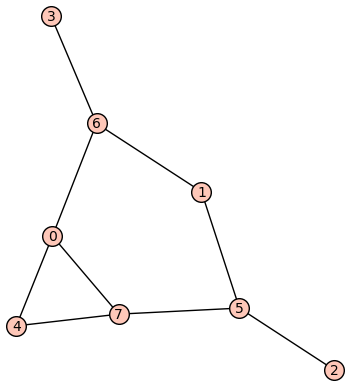

Graf 


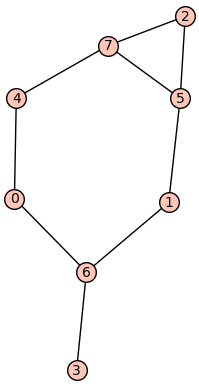

Graf 


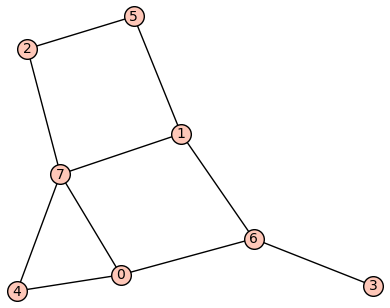

Graf 


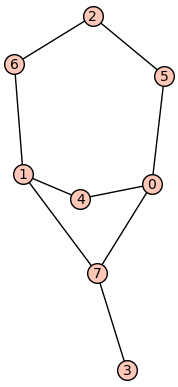

Graf 


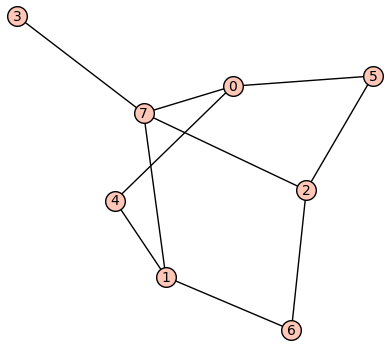

Graf 


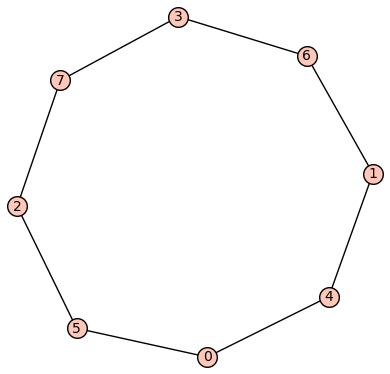

Graf 


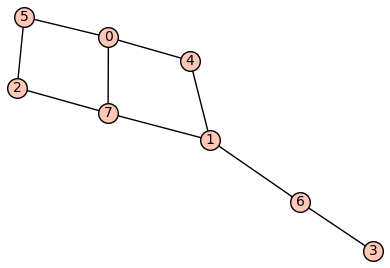

Graf 


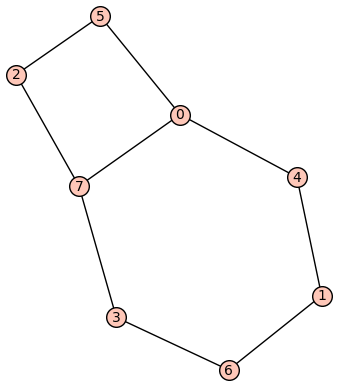

Graf 


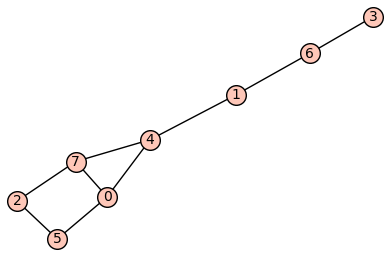

Graf 


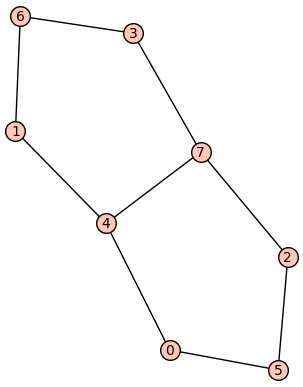

Graf 


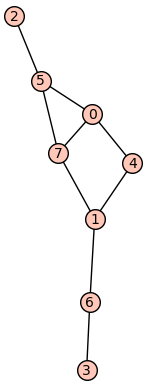

Graf 


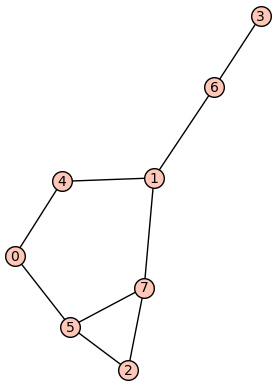

Graf 


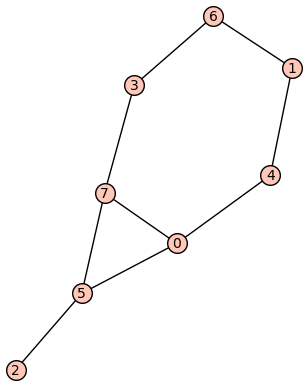

Graf 


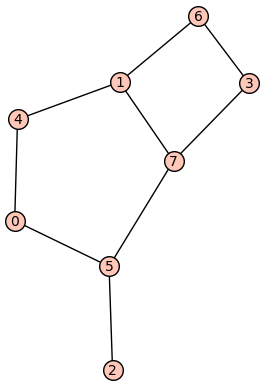

Graf 


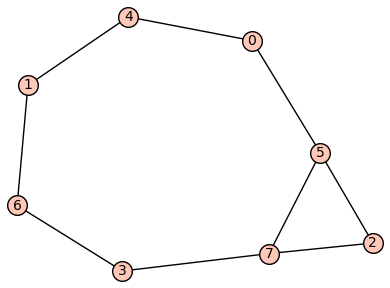

Graf 


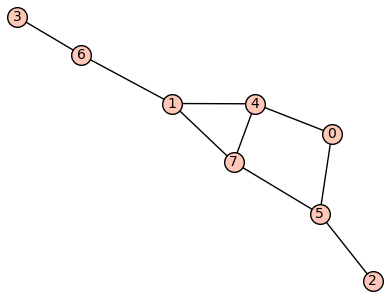

Graf 


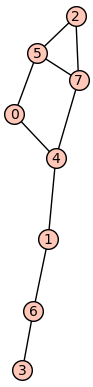

Graf 


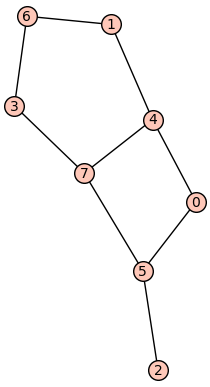

Graf 


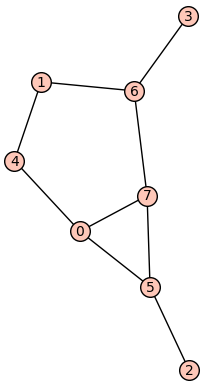

Graf 


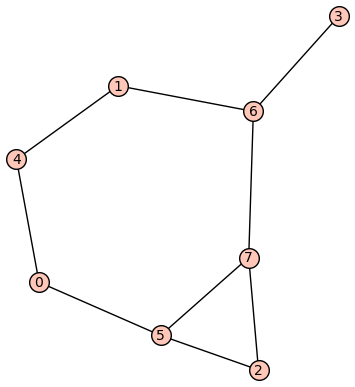

Graf 


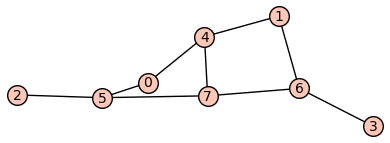

Graf 


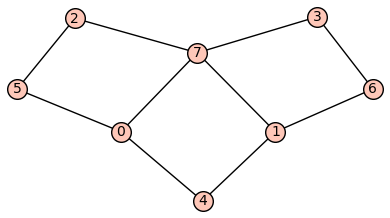

Graf 


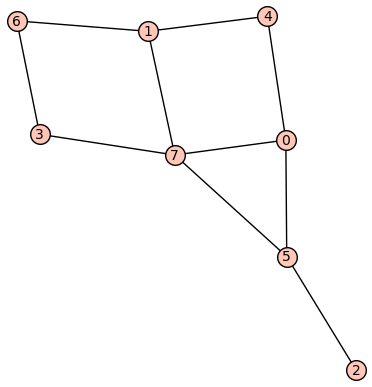

Graf 


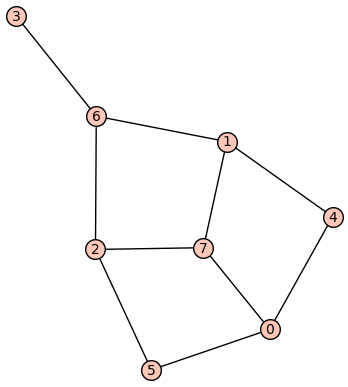

Graf 


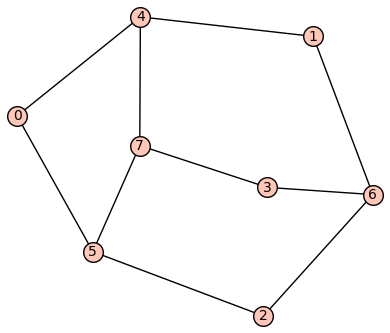

Graf 


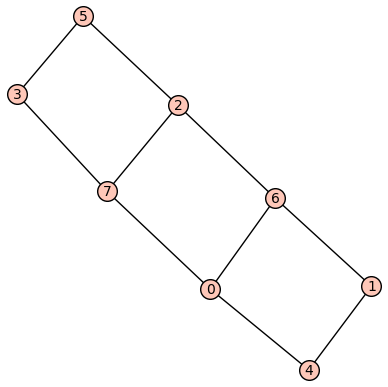

Graf 


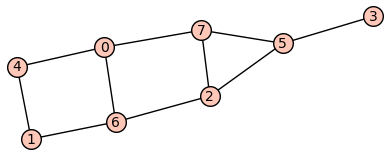

Graf 


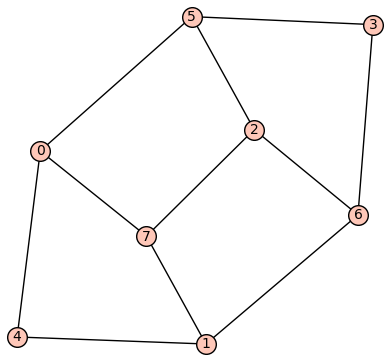

Graf 


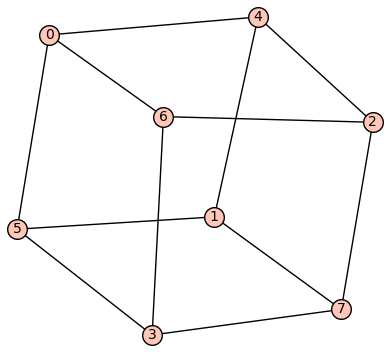

Graf 


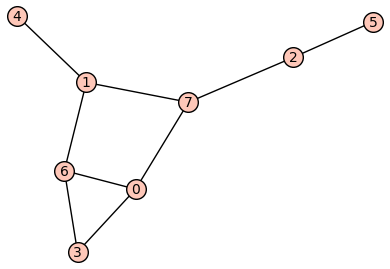

Graf 


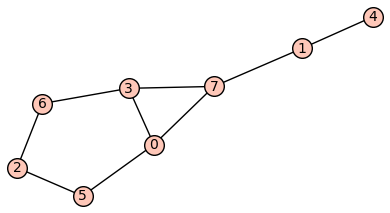

Graf 


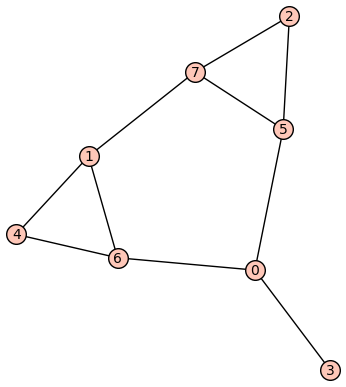

Graf 


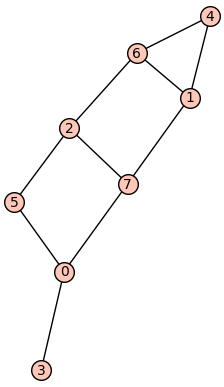

Graf 


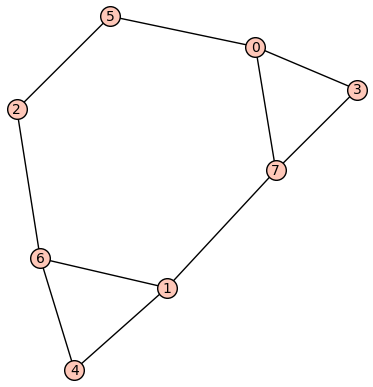

Graf 


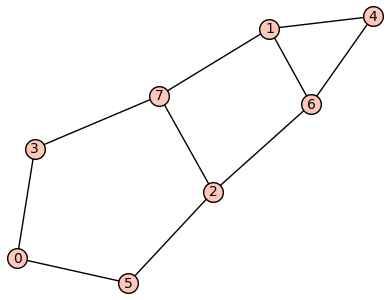

Graf 


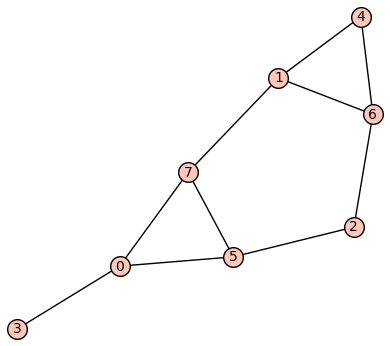

Graf 


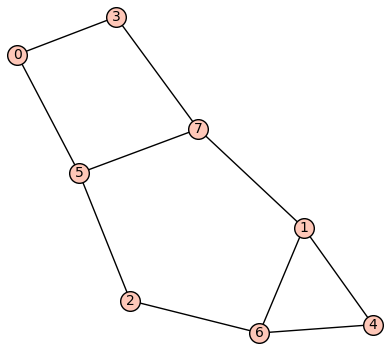

Graf 


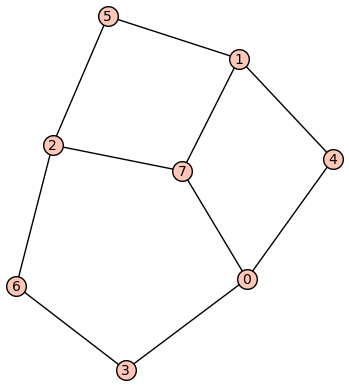

Graf 


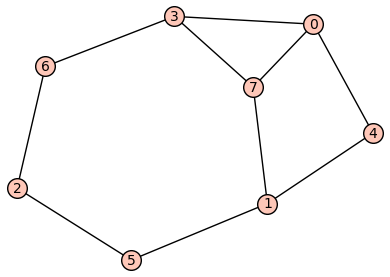

Graf 


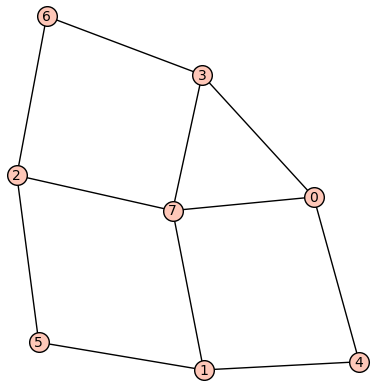

Graf 


In [22]:
poisci_grafe_z_wmdim_k_n(5,8,3)

In [28]:
# za n, n-1, n-2
def poisci_grafe_z_wmdim_k_n_minus_k(od, do, k):
    for i in range(od, do + 1):
        print(f'Povezani grafi na {i} vozliscih z wmdim_k(G) = {i-k}:')
        for G in graphs.nauty_geng(f'{i} -c'):
            kappa_2crti = kappa_2_crti(G)
            for k in range(1, kappa_2crti + 1):
                wmdim_k, _ = CLP_weak_k_dim(G, k)
                if wmdim_k == i - k:
                    G.show()
                    print(f'Graf {G.name()}')

Za $n-1$:

Povezani grafi na 5 vozliscih z wmdim_k(G) = 4:


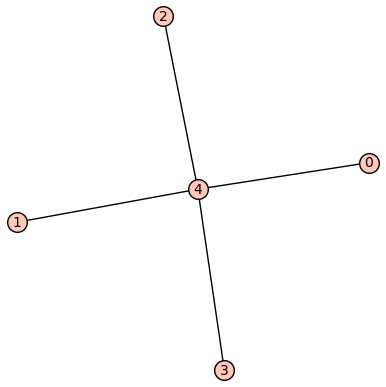

Graf 


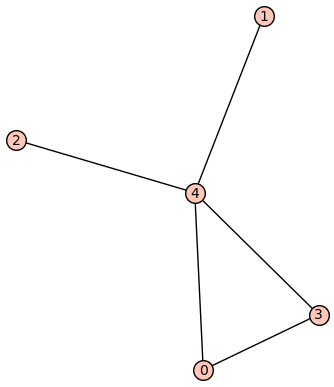

Graf 


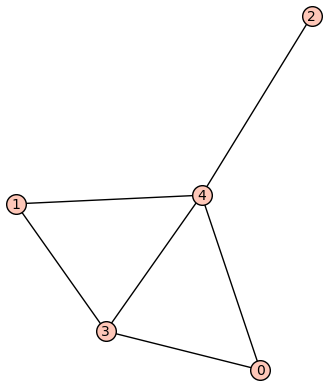

Graf 


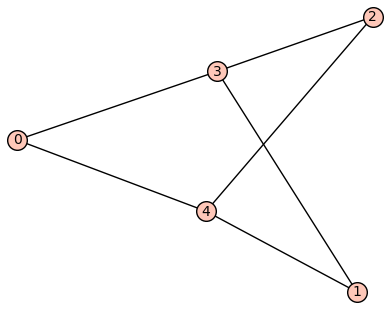

Graf 


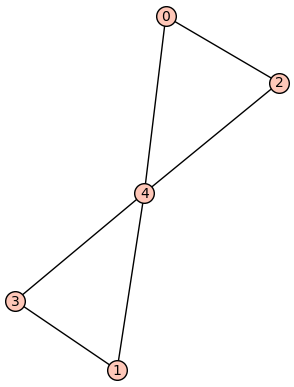

Graf 


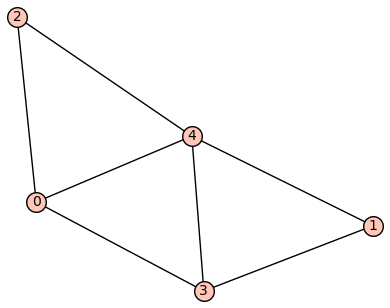

Graf 


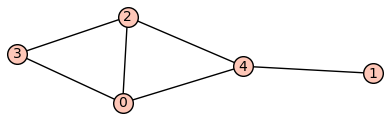

Graf 


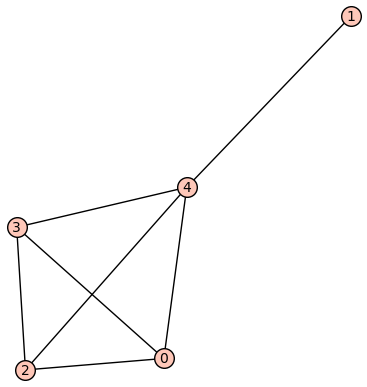

Graf 


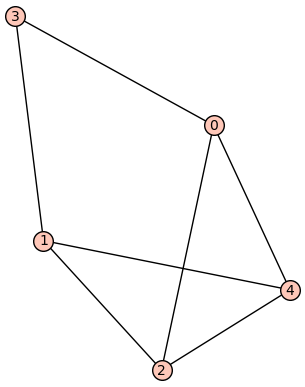

Graf 


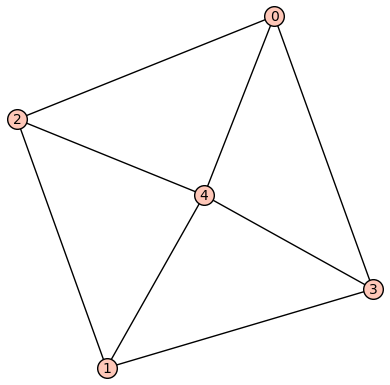

Graf 
Povezani grafi na 6 vozliscih z wmdim_k(G) = 5:


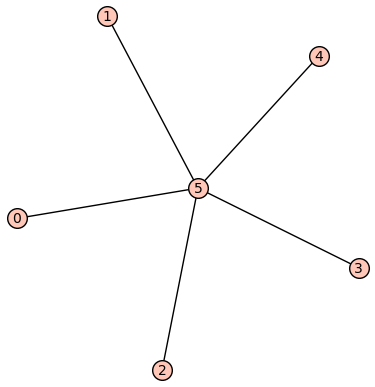

Graf 


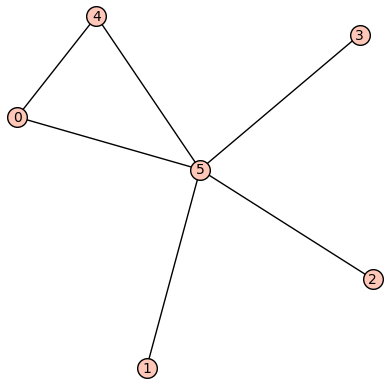

Graf 


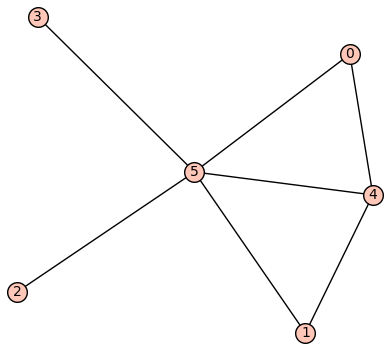

Graf 


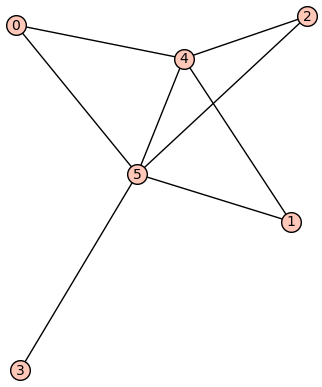

Graf 


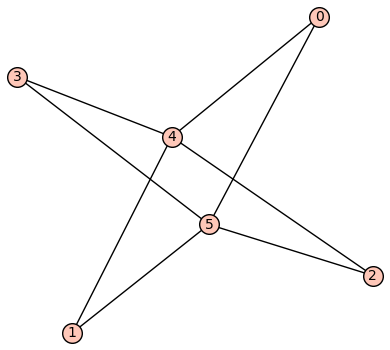

Graf 


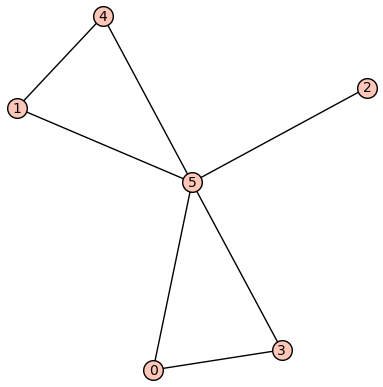

Graf 


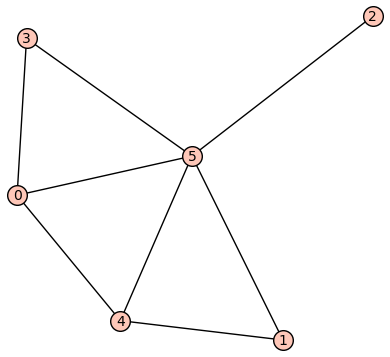

Graf 


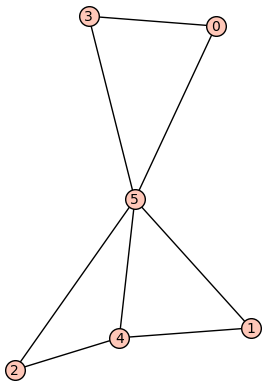

Graf 


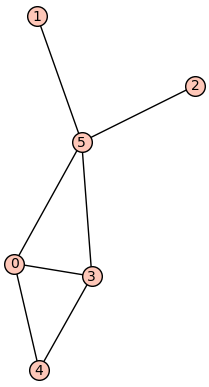

Graf 


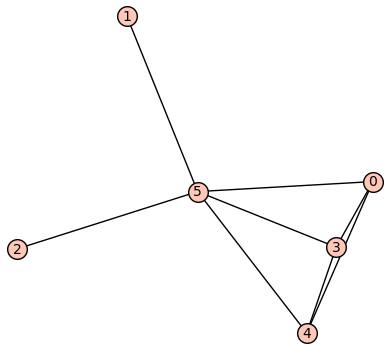

Graf 


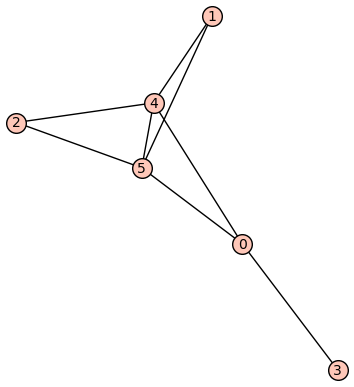

Graf 


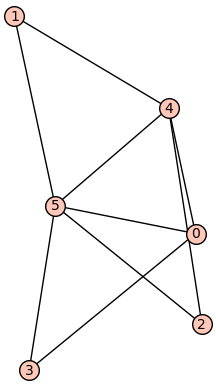

Graf 


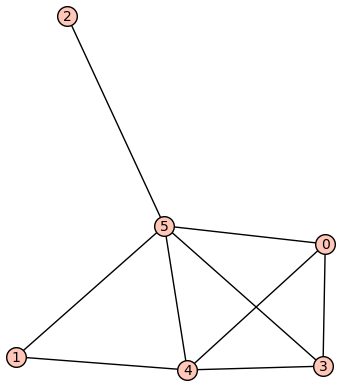

Graf 


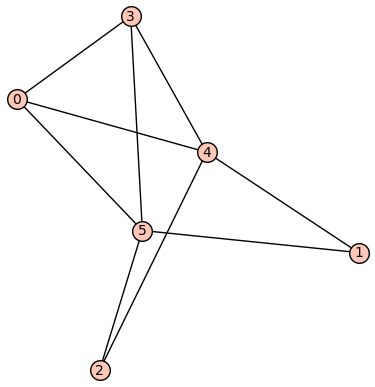

Graf 


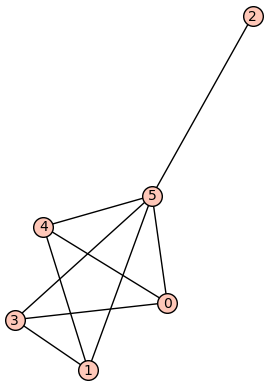

Graf 


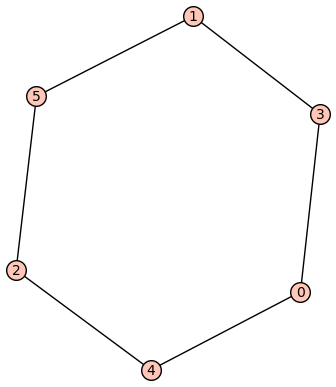

Graf 


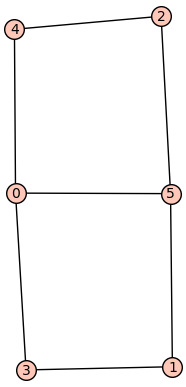

Graf 


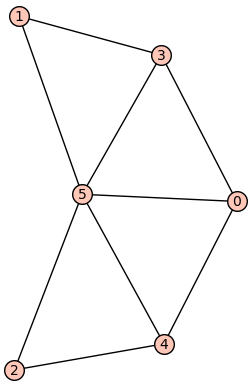

Graf 


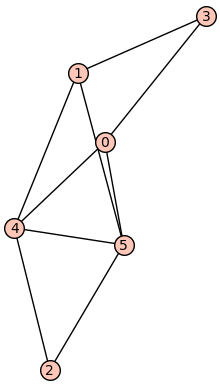

Graf 


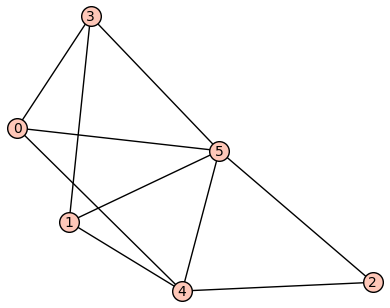

Graf 


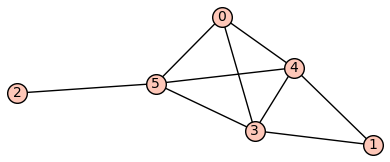

Graf 


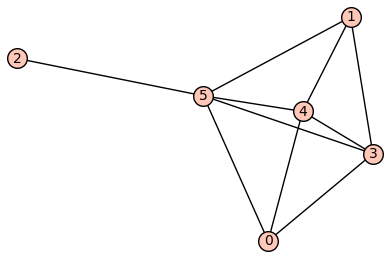

Graf 


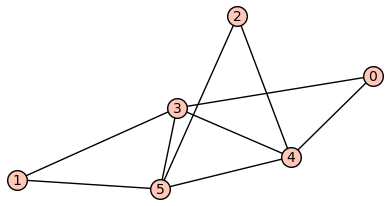

Graf 


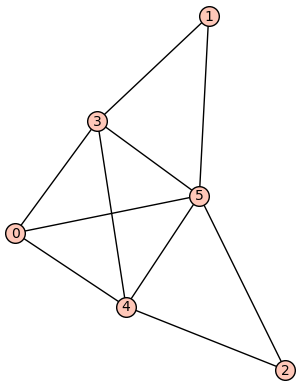

Graf 


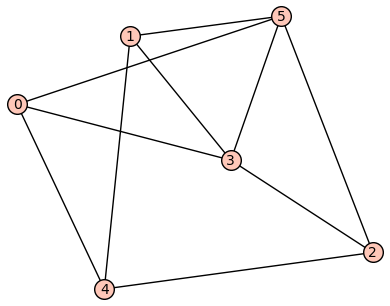

Graf 


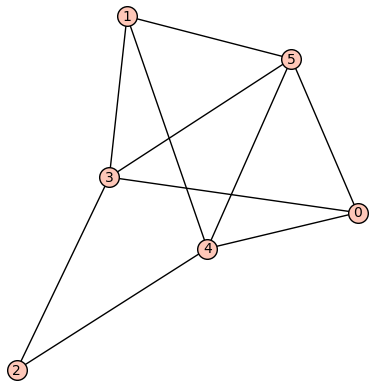

Graf 


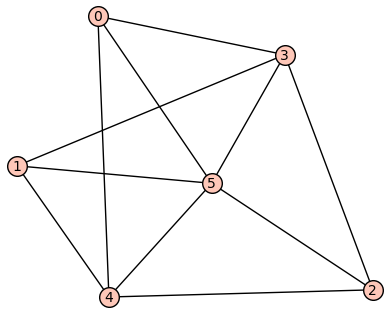

Graf 


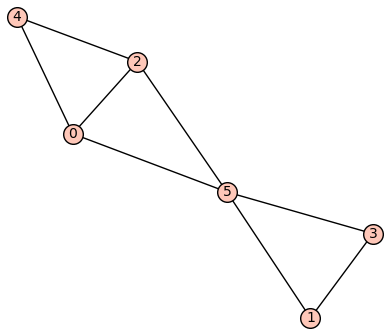

Graf 


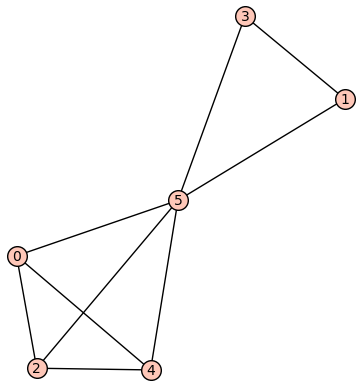

Graf 


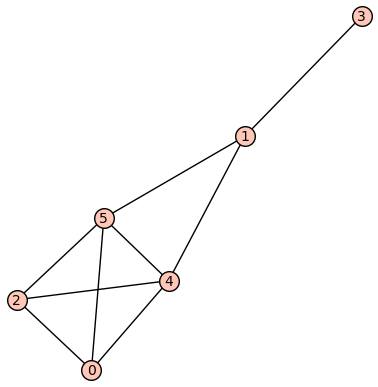

Graf 


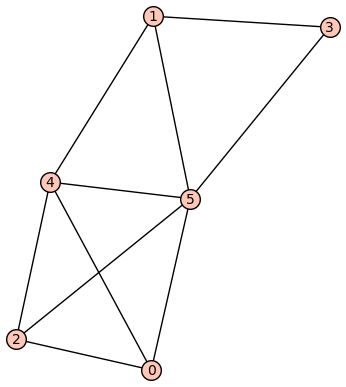

Graf 


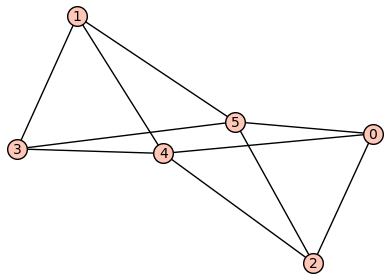

Graf 


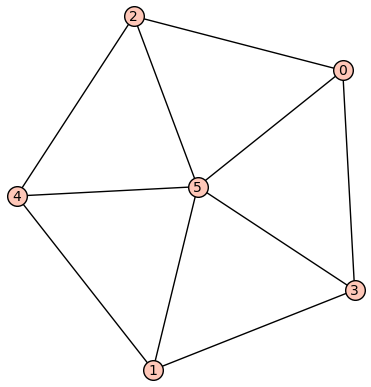

Graf 


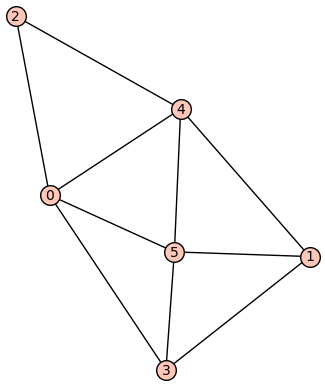

Graf 


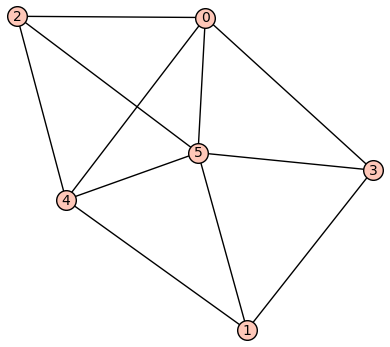

Graf 


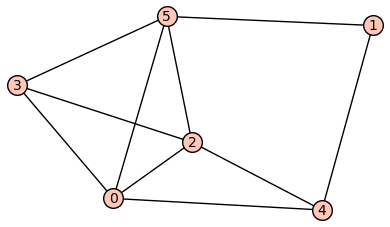

Graf 


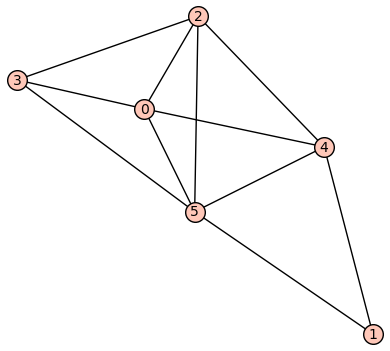

Graf 


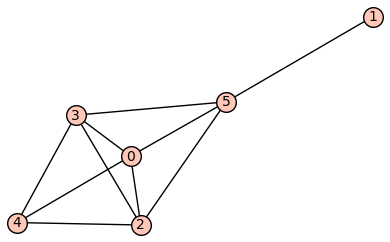

Graf 


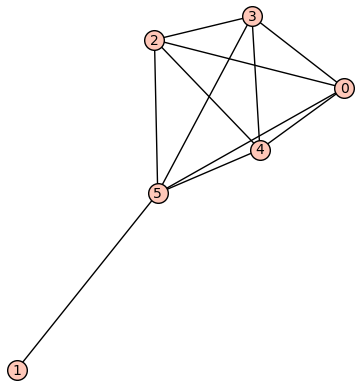

Graf 


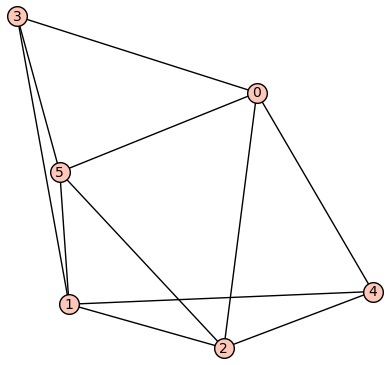

Graf 


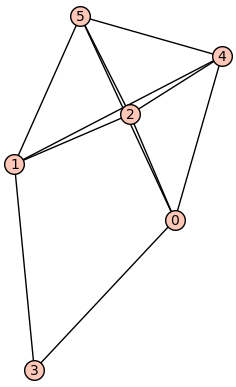

Graf 


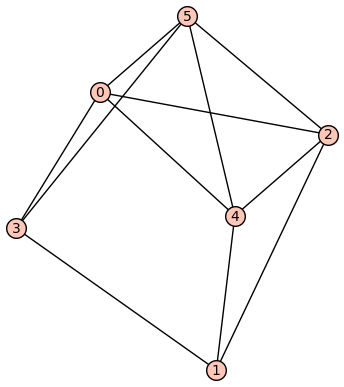

Graf 


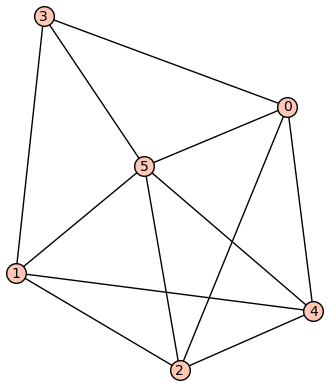

Graf 


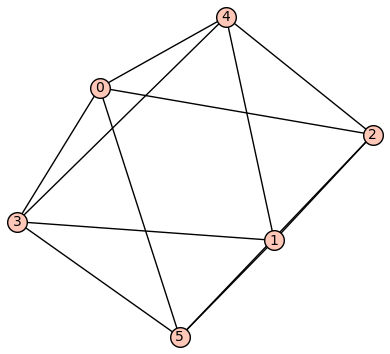

Graf 


In [29]:
poisci_grafe_z_wmdim_k_n_minus_k(5, 6, 1)